No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


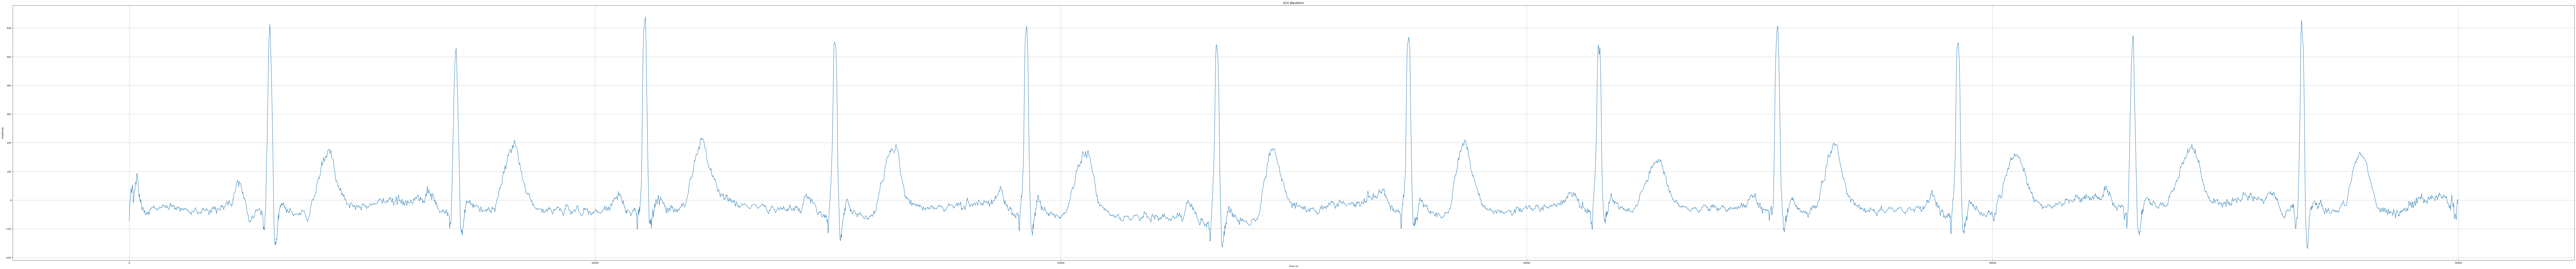

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the .asc file
file_path = "./124.asc"  # Replace with the actual path to your file
ecg_data = np.loadtxt(file_path)


# Extract the first column
first_column = ecg_data[:, 0]

# Generate time values for the x-axis
time_values = np.arange(0, len(first_column) * 10, 10)

# Plot the ECG wave for the first lead
plt.plot(time_values, first_column)



# Customize the plot
plt.title('ECG Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

# Adjust figure size and DPI to avoid the ValueError
fig = plt.gcf()
fig.set_size_inches(200, 20)  # Adjust the size as needed
fig.set_dpi(100)  # Adjust the DPI as needed

# Show the plot
plt.show()


In [2]:
import numpy as np

# Load the data from the .asc file
file_path = "./124.asc"  # Replace with the actual path to your file
ecg_data = np.loadtxt(file_path)


# Loop through each row and column
for row in ecg_data:
    for element in row:
        print(f"{element:.2f}", end="\t")  # Format each element to 2 decimal places
    print()  # Move to the next row

-73.00	48.00	3.00	158.00	108.00	75.00	-1.00	-30.00	
-29.00	77.00	37.00	152.00	142.00	137.00	32.00	25.00	
-5.00	75.00	16.00	187.00	163.00	143.00	106.00	85.00	
17.00	15.00	-5.00	163.00	182.00	127.00	93.00	83.00	
42.00	13.00	36.00	216.00	179.00	144.00	74.00	106.00	
25.00	83.00	25.00	221.00	155.00	120.00	100.00	75.00	
37.00	75.00	51.00	219.00	249.00	148.00	71.00	97.00	
53.00	61.00	54.00	236.00	222.00	157.00	103.00	147.00	
37.00	115.00	30.00	201.00	183.00	164.00	123.00	95.00	
-10.00	69.00	76.00	207.00	145.00	198.00	135.00	113.00	
2.00	63.00	58.00	222.00	113.00	180.00	126.00	116.00	
31.00	65.00	62.00	213.00	156.00	160.00	133.00	114.00	
34.00	61.00	-13.00	180.00	148.00	171.00	103.00	114.00	
51.00	68.00	-29.00	166.00	122.00	189.00	92.00	102.00	
64.00	94.00	-52.00	164.00	118.00	171.00	99.00	90.00	
54.00	65.00	-35.00	147.00	98.00	175.00	94.00	93.00	
92.00	63.00	-1.00	158.00	133.00	124.00	117.00	101.00	
93.00	49.00	-13.00	138.00	124.00	89.00	105.00	101.00	
74.00	41.00	14.00	122.00	140.00	125.00	1

### R-peak detection and R-R interval extraction:

In [ ]:
import numpy as np
from scipy.signal import find_peaks

def extract_rr_intervals(ecg_lead):
    # Find R-peak locations
    peaks, _ = find_peaks(ecg_lead, distance=200)  # Adjust the distance parameter as needed
    
    # Calculate R-R intervals
    rr_intervals = np.diff(peaks) / sampling_rate  # Assuming sampling_rate is known
    
    return rr_intervals

# Example usage
lead_index = 0  # Choose the lead index (0-7)
ecg_lead = ecg_data[:, lead_index]
rr_intervals = extract_rr_intervals(ecg_lead)

### QRS complex analysis:

In [ ]:
import numpy as np
from scipy.signal import find_peaks

def extract_qrs_features(ecg_lead):
    # Find R-peak locations
    peaks, _ = find_peaks(ecg_lead, distance=200)  # Adjust the distance parameter as needed
    
    # Extract QRS complex features
    qrs_durations = []
    qrs_amplitudes = []
    for peak_idx in peaks:
        # Define a window around the R-peak
        window_start = max(0, peak_idx - 50)  # Adjust window size as needed
        window_end = min(len(ecg_lead), peak_idx + 50)
        qrs_segment = ecg_lead[window_start:window_end]
        
        # Calculate QRS duration
        qrs_duration = len(qrs_segment) / sampling_rate
        qrs_durations.append(qrs_duration)
        
        # Calculate QRS amplitude
        qrs_amplitude = np.max(qrs_segment) - np.min(qrs_segment)
        qrs_amplitudes.append(qrs_amplitude)
    
    return qrs_durations, qrs_amplitudes

# Example usage
lead_index = 0  # Choose the lead index (0-7)
ecg_lead = ecg_data[:, lead_index]
qrs_durations, qrs_amplitudes = extract_qrs_features(ecg_lead)

### Principal Component Analysis (PCA):

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

# Reshape ECG data to 2D (samples x features)
ecg_data_2d = ecg_data.reshape(-1, ecg_data.shape[-1])

# Standardize the data
ecg_data_std = (ecg_data_2d - np.mean(ecg_data_2d, axis=0)) / np.std(ecg_data_2d, axis=0)

# Perform PCA
pca = PCA(n_components=0.95)  # Explain 95% of the variance
ecg_data_pca = pca.fit_transform(ecg_data_std)

# Get the number of principal components
n_components = ecg_data_pca.shape[1]
print(f"Number of principal components: {n_components}")